# Préparation des données

In [1]:
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install umap-learn

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8.6, 6]
#plt.rcParams['figure.dpi'] = 100

In [2]:
df = pd.read_csv('data/spectre2020.csv.gz', index_col=0)
df.label = df.label.astype("category")

In [3]:
# Conversion idx <-> label pour simplifier les manipulations
idx2lbl = dict(enumerate(df.label.cat.categories))
lbl2idx = {v:k for k,v in idx2lbl.items()}
# Couleur selon la catégorie
lblcol = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])
cats = np.array(df.label.cat.categories)

In [4]:
X = df.iloc[:,:-1].to_numpy()                            # spectres
Y = df.label.cat.codes.to_numpy(dtype=int)               # code catégorie
lam = np.asarray([int(x[:-2]) for x in df.columns[:-1]]) # longueurs d'onde
X, Y, lam

(array([[0.044483, 0.043981, 0.043597, ..., 0.437308, 0.436695, 0.436071],
        [0.054652, 0.054295, 0.054536, ..., 0.504374, 0.503532, 0.502659],
        [0.045393, 0.045598, 0.046701, ..., 0.516064, 0.515456, 0.514852],
        ...,
        [0.057555, 0.057545, 0.05807 , ..., 0.428549, 0.427777, 0.426968],
        [0.053925, 0.053901, 0.054246, ..., 0.506812, 0.506044, 0.505287],
        [0.061303, 0.061147, 0.060652, ..., 0.459942, 0.459214, 0.458452]]),
 array([3, 2, 3, ..., 2, 1, 2]),
 array([ 350,  351,  352, ..., 1698, 1699, 1700]))

# Classificateurs version 0

In [5]:
# À décommenter selon le prétraitement souhaité
# X = Xsnv
# X = Xmsc
# X = Xl1
X /= np.sum(X, axis=1, keepdims=True)

## Support Vector Machine (SVC)

In [6]:
from sklearn.svm import SVC

### Apprentissage

In [7]:
svc = SVC()
svc.fit(X, Y)

SVC()

### Prédiction

In [8]:
Ypred = svc.predict(X)
print(f'prediction: {Ypred}')
print(f'réalité: {Y}')

prediction: [3 2 3 ... 2 2 2]
réalité: [3 2 3 ... 2 1 2]


### Performances

In [9]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y, Ypred)
# acc = np.mean(Y != Ypred)
print(f'Accuracy: {100*acc:.2f}%')

Accuracy: 60.71%


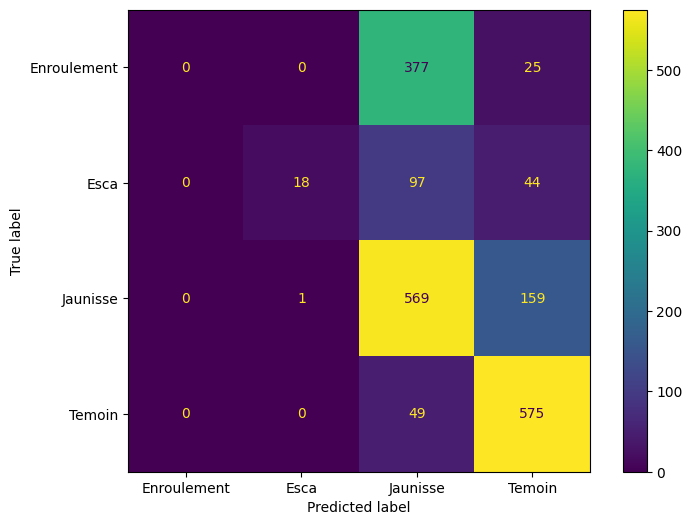

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y, Ypred, display_labels=cats)

## Random Forest (RF)

In [11]:
from sklearn.ensemble import RandomForestClassifier

### Apprentissage

In [12]:
rf = RandomForestClassifier()
rf.fit(X, Y)

RandomForestClassifier()

### Prédiction

In [13]:
Ypred = rf.predict(X)
print(f'prediction: {Ypred}')
print(f'réalité: {Y}')

prediction: [3 2 3 ... 2 1 2]
réalité: [3 2 3 ... 2 1 2]


### Performances

In [14]:
acc = accuracy_score(Y, Ypred)
# acc = np.mean(Y != Ypred)
print(f'Accuracy: {100*acc:.2f}%')

Accuracy: 100.00%


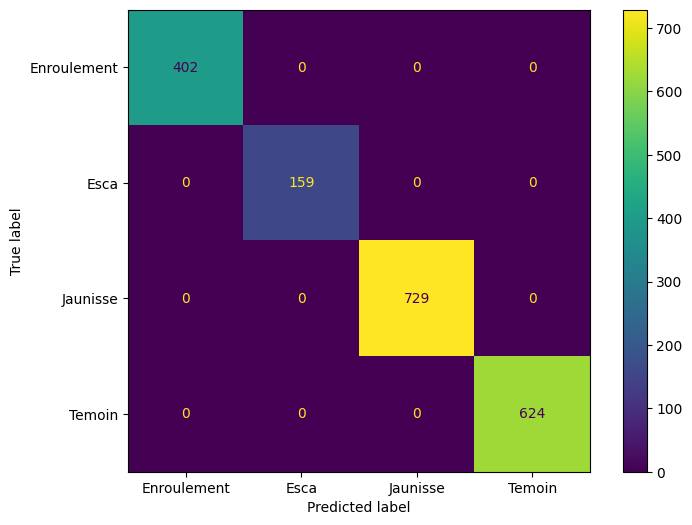

In [15]:
ConfusionMatrixDisplay.from_predictions(Y, Ypred, display_labels=cats)

## Lineaire (LDA)

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Apprentissage

In [17]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, Y)

LinearDiscriminantAnalysis()

### Prédiction

In [18]:
Ypred = lda.predict(X)
print(f'prediction: {Ypred}')
print(f'réalité: {Y}')

prediction: [3 2 3 ... 2 1 2]
réalité: [3 2 3 ... 2 1 2]


### Performances

In [19]:
acc = accuracy_score(Y, Ypred)
# acc = np.mean(Y != Ypred)
print(f'Accuracy: {100*acc:.2f}%')

Accuracy: 100.00%


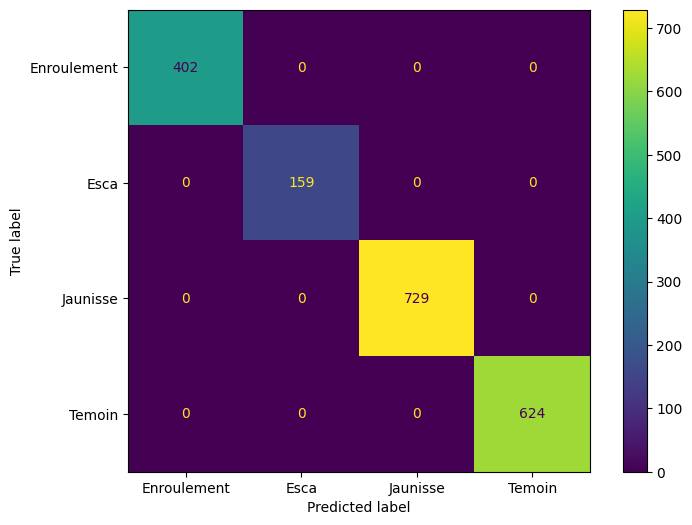

In [20]:
ConfusionMatrixDisplay.from_predictions(Y, Ypred, display_labels=cats)

# Classificateurs version 1

## Préparation des ensembles d'entrainement et de test

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    train_size=0.8,
    shuffle=True,
    random_state=None) # À fixer pour répétabilité
print(f'training size: {X_train.shape[0]}')
print(f'test size: {X_test.shape[0]}')

training size: 1531
test size: 383


## Support Vector Machine (SVC)

### Apprentissage

In [22]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

### Prédiction

In [23]:
Ypred = svc.predict(X_test)
print(f'prediction: {Ypred}')
print(f'réalité: {Y_test}')

prediction: [2 2 3 3 2 2 2 2 3 3 2 2 2 2 2 3 2 3 2 2 3 3 2 3 3 2 2 2 3 2 3 2 2 3 3 2 2
 3 2 3 2 2 3 3 3 2 2 3 2 3 2 2 2 2 2 2 3 3 3 3 3 3 2 2 2 2 1 2 3 2 3 2 2 2
 3 2 2 2 2 2 3 2 3 2 2 3 3 2 2 3 3 2 2 3 2 2 3 2 2 3 2 2 3 2 3 3 2 2 3 3 2
 2 3 3 2 3 3 3 2 2 2 2 3 3 2 2 3 2 3 2 2 2 2 3 2 2 2 2 2 3 3 3 3 3 3 3 2 3
 2 2 2 2 2 3 3 3 2 2 3 2 3 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 2 3 3 2 2 2 2 2 2
 3 3 3 2 3 3 3 2 3 2 2 3 2 2 3 3 2 2 3 3 3 2 2 3 3 3 2 2 2 2 2 3 2 2 2 2 2
 3 3 2 2 3 2 3 3 2 2 2 3 3 1 2 2 3 3 2 3 3 3 3 2 3 3 2 2 3 3 2 3 3 3 2 2 3
 3 2 2 2 3 3 3 2 3 2 3 3 2 2 2 3 2 3 2 2 3 3 3 2 2 3 2 2 2 3 2 2 3 2 2 2 2
 2 3 3 2 2 2 2 2 2 3 2 2 2 2 2 2 3 1 2 3 2 2 2 3 3 3 3 2 3 2 2 3 3 2 3 3 3
 3 3 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 3 2 2 3 2 3 2 2 3 2 3 3 3 3 2 3
 2 2 2 2 2 2 2 2 3 3 2 3 1]
réalité: [0 0 3 2 1 2 0 2 1 3 2 3 2 0 2 1 0 2 0 2 3 3 2 3 3 3 0 2 2 0 2 0 2 3 3 2 2
 0 2 3 2 2 3 3 2 0 2 0 2 3 2 0 2 0 2 0 1 3 3 3 3 3 0 2 2 0 1 2 2 1 3 1 2 2
 3 0 0 0 2 0 2 2 3 2 2 2 2 2 2 3 2 2 0 3 2 2 3 0 2 

### Performances

In [24]:
acc = accuracy_score(Y_test, Ypred)
# acc = np.mean(Y != Ypred)
print(f'Accuracy: {100*acc:.2f}%')

Accuracy: 58.49%


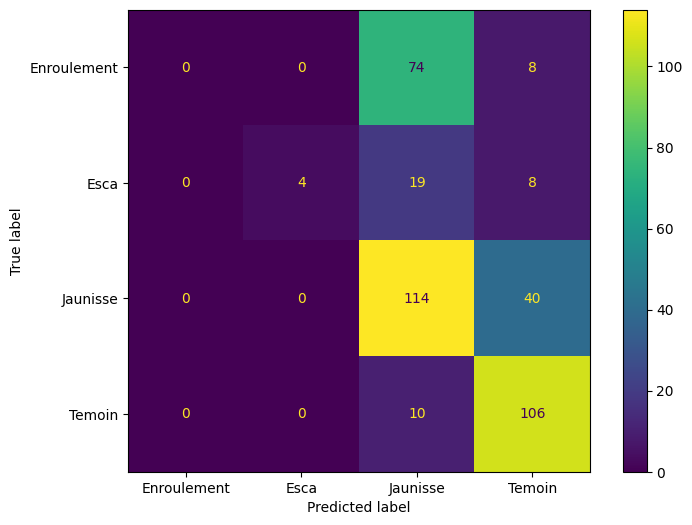

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, Ypred, display_labels=cats)

## Random Forest (RF)

### Apprentissage

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

### Prédiction

In [27]:
Ypred = rf.predict(X_test)
print(f'prediction: {Ypred}')
print(f'réalité: {Y_test}')

prediction: [0 0 3 3 2 2 0 2 3 3 2 2 2 2 2 3 2 3 0 2 3 3 2 3 3 2 0 2 3 0 3 0 2 3 3 2 2
 3 2 2 2 0 3 3 3 0 2 3 2 3 2 0 2 0 2 0 3 3 3 3 3 3 2 2 2 0 1 2 3 1 3 1 2 0
 3 0 0 0 2 0 2 0 3 2 2 3 3 2 2 3 1 2 0 3 2 2 3 0 2 3 0 2 3 2 3 3 0 2 0 3 2
 2 2 3 0 3 3 3 2 0 0 0 3 3 0 0 2 0 3 0 2 0 2 3 2 2 2 0 2 3 3 0 3 3 3 3 2 3
 0 2 0 0 2 3 3 3 0 2 0 2 3 2 0 2 2 2 1 3 3 3 3 3 3 2 3 3 2 3 3 2 0 2 0 2 2
 3 3 3 0 3 3 3 2 3 2 2 3 1 0 3 3 2 2 3 3 3 2 0 3 3 3 0 2 2 2 2 3 2 0 2 0 0
 3 3 2 2 3 2 3 3 2 2 2 3 2 1 0 0 3 3 2 3 2 2 3 0 2 3 0 2 3 3 2 3 3 3 2 0 3
 3 0 0 0 2 3 3 2 3 2 3 3 2 0 2 3 3 3 0 2 3 3 3 0 2 3 2 1 2 3 1 2 3 2 2 2 1
 0 3 3 0 0 2 2 2 2 3 2 2 1 2 0 2 3 1 2 3 0 0 2 3 3 3 3 2 3 2 2 3 3 3 0 3 2
 3 2 2 2 0 2 0 2 0 2 2 0 1 3 0 0 0 1 2 0 0 3 2 2 3 2 3 0 2 3 2 3 3 2 3 2 3
 0 1 0 2 2 0 0 2 3 3 0 3 1]
réalité: [0 0 3 2 1 2 0 2 1 3 2 3 2 0 2 1 0 2 0 2 3 3 2 3 3 3 0 2 2 0 2 0 2 3 3 2 2
 0 2 3 2 2 3 3 2 0 2 0 2 3 2 0 2 0 2 0 1 3 3 3 3 3 0 2 2 0 1 2 2 1 3 1 2 2
 3 0 0 0 2 0 2 2 3 2 2 2 2 2 2 3 2 2 0 3 2 2 3 0 2 

### Performances

In [28]:
acc = accuracy_score(Y_test, Ypred)
# acc = np.mean(Y != Ypred)
print(f'Accuracy: {100*acc:.2f}%')

Accuracy: 72.32%


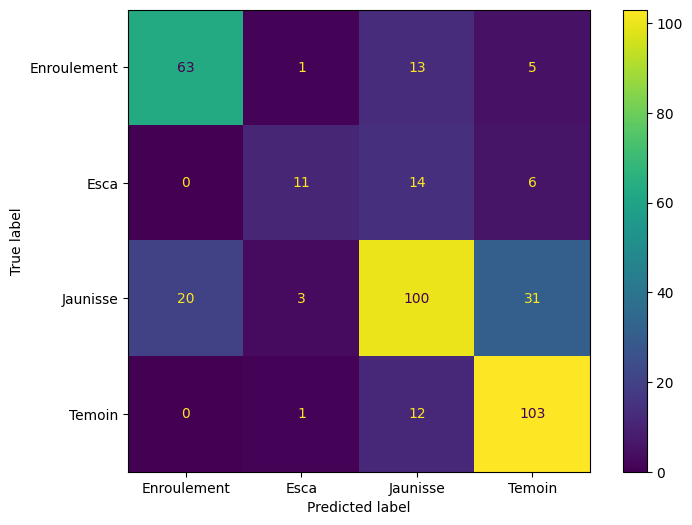

In [29]:
ConfusionMatrixDisplay.from_predictions(Y_test, Ypred, display_labels=cats)

## Lineaire (LDA)

### Apprentissage

In [30]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

### Prédiction

In [31]:
Ypred = lda.predict(X_test)
print(f'prediction: {Ypred}')
print(f'réalité: {Y_test}')

prediction: [0 0 3 2 1 2 0 2 1 3 2 3 2 0 2 1 0 2 0 2 3 3 2 3 3 3 0 2 2 0 2 0 2 3 3 2 2
 0 2 3 2 2 3 3 2 0 2 0 2 3 2 0 2 0 2 0 1 3 3 3 3 3 0 2 2 0 1 2 2 1 3 1 2 2
 3 0 0 0 2 0 2 2 3 2 2 2 2 2 2 3 2 2 0 3 2 2 3 0 2 2 2 2 3 2 3 2 0 2 2 3 2
 2 2 3 2 3 2 3 2 0 2 2 3 3 0 0 3 0 3 0 1 0 1 3 2 3 3 0 2 2 3 0 2 3 3 3 2 3
 0 2 0 2 2 3 3 3 0 1 0 2 2 0 0 2 2 2 1 3 3 3 0 3 3 2 3 3 2 3 3 2 0 2 0 2 3
 2 3 3 0 2 3 1 2 0 2 2 3 2 2 3 1 2 3 3 3 2 2 0 3 2 3 0 3 2 2 2 2 2 0 2 0 0
 3 3 0 2 3 2 3 3 2 2 2 3 3 1 2 0 3 3 2 3 0 2 3 0 1 3 0 2 3 2 1 3 3 2 2 0 3
 2 0 2 2 2 2 3 2 3 2 1 3 2 0 2 3 2 2 0 2 3 2 3 0 2 3 2 0 2 3 1 2 3 2 0 2 1
 2 3 3 2 0 2 0 2 2 3 2 1 2 1 0 2 0 1 1 3 2 0 2 3 2 3 3 1 3 2 0 3 3 2 2 3 2
 3 2 0 2 0 2 0 2 0 2 1 0 1 3 0 2 0 1 1 0 0 2 0 2 3 0 3 0 2 2 2 3 3 2 3 2 3
 2 3 0 1 2 2 0 0 2 3 0 2 1]
réalité: [0 0 3 2 1 2 0 2 1 3 2 3 2 0 2 1 0 2 0 2 3 3 2 3 3 3 0 2 2 0 2 0 2 3 3 2 2
 0 2 3 2 2 3 3 2 0 2 0 2 3 2 0 2 0 2 0 1 3 3 3 3 3 0 2 2 0 1 2 2 1 3 1 2 2
 3 0 0 0 2 0 2 2 3 2 2 2 2 2 2 3 2 2 0 3 2 2 3 0 2 

### Performances

In [32]:
acc = accuracy_score(Y_test, Ypred)
# acc = np.mean(Y != Ypred)
print(f'Accuracy: {100*acc:.2f}%')

Accuracy: 98.96%


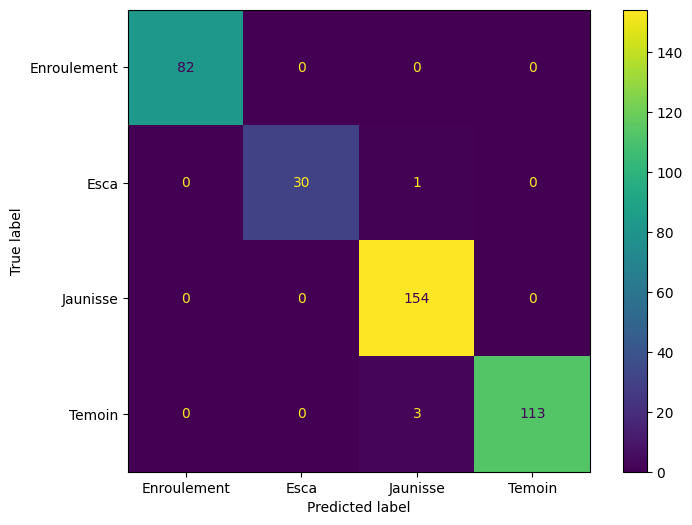

In [33]:
ConfusionMatrixDisplay.from_predictions(Y_test, Ypred, display_labels=cats)